# Demo No. 9 - Radial velocities

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt

from astropy import units as u

from elisa import BinarySystem
from elisa import Star
from elisa import Observer

Along light curves, Elisa is capable of calculating radial velocity curves as well. We will now demonstrate, how to do it in the Elisa framework. As usual, we will start with defining the binary system and the observer class. In case of the Observer class, we do not have to specify observation passbands since we are interested only in radial velocities.

In [2]:
primary = Star(
    mass=2.15 * u.solMass,
    surface_potential=4.0,
    synchronicity=1.5,
    t_eff=7000 * u.K,
    gravity_darkening=1.0,
    discretization_factor=3,  # angular size (in degrees) of the surface elements
    albedo=0.6,
    metallicity=0.0,
)

secondary = Star(
    mass=1.2 * u.solMass,
    surface_potential=4.5,
    synchronicity=1.0,
    t_eff=6000 * u.K,
    gravity_darkening=1.0,
    albedo=0.6,
    metallicity=0,
)

binary_system = BinarySystem(
    primary=primary,
    secondary=secondary,
    argument_of_periastron=58 * u.deg,
    gamma=-30.7 * u.km / u.s,
    period=2.5 * u.d,
    eccentricity=0.0,
    inclination=85 * u.deg,
    primary_minimum_time=2440000.0 * u.d,
    phase_shift=0.0,
)

observer = Observer(system=binary_system)
# observer = Observer(passband=[], system=binary_system)

2021-06-16 10:55:55,069 - 9610 - binary_system.system - INFO: initialising object BinarySystem
2021-06-16 10:55:55,096 - 9610 - binary_system.system - INFO: setting discretization factor of secondary component to 5.27 according to discretization factor of the primary component.
2021-06-16 10:55:55,097 - 9610 - observer.observer - INFO: initialising Observer instance


Process to obtain of radial velocity curves is very similar to the calculation of the light curve. This fast 'kinematic' method modells only radial velocities of the centre of masses of the components and thus it usefull when effects of rotation, spots or pulsations are not significant:

In [3]:
phases, rvs = observer.rv(
    from_phase=-0.6,
    to_phase=0.6,
    phase_step=0.01,
    method='kinematic'
)

The way to visualize the obtained data is also very similar to the visualization of the light curve described in previous tutorials:

<IPython.core.display.Javascript object>


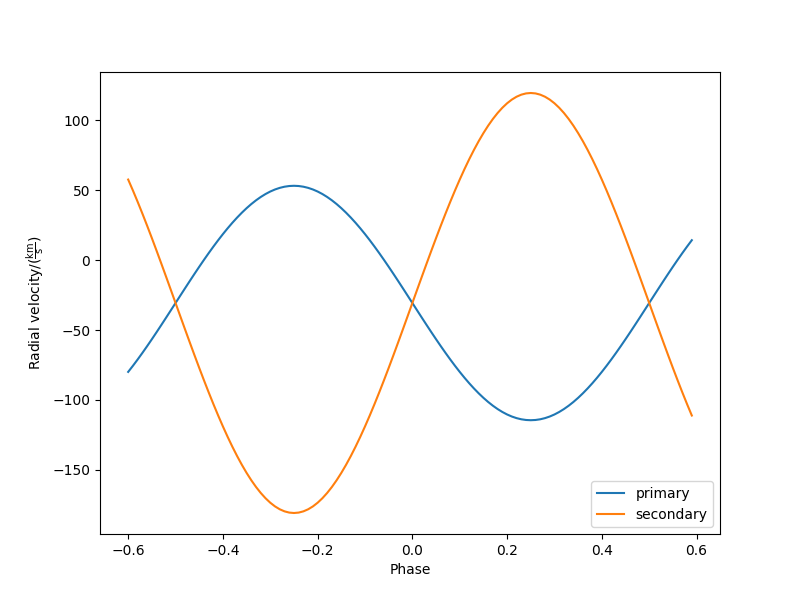

In [4]:
observer.plot.rv_curve(unit=u.km/u.s)

Since verion 0.4, Elisa also support modelling of 'radiometric' method for calculation of RVs where flux-weighted contribution from every visible surface element is taken into an account during RV calculation. Such metho can be used to model Rossiter–McLaughlin effect, effects of spots or even pulsations on the shape of the RVs.

In [5]:
phases2, rvs2 = observer.rv(
    from_phase=-0.6,
    to_phase=0.6,
    phase_step=0.01,
    method='radiometric'
)

Note how in this case the RV of secondary component is not modelled during the secondary eclipse since due to the total eclipse of the secondary component.

<IPython.core.display.Javascript object>


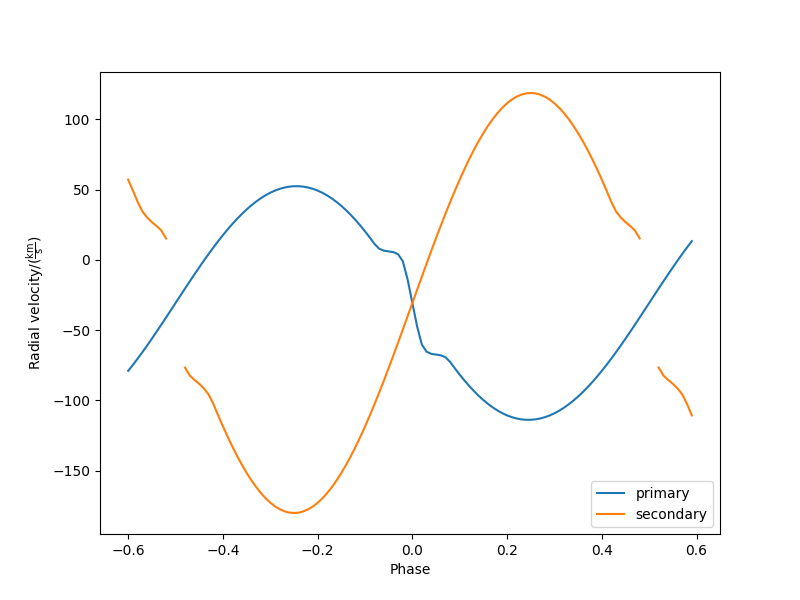

In [6]:
observer.plot.rv_curve(unit=u.km/u.s)

We can also visualize the comparision of those two models:

<IPython.core.display.Javascript object>


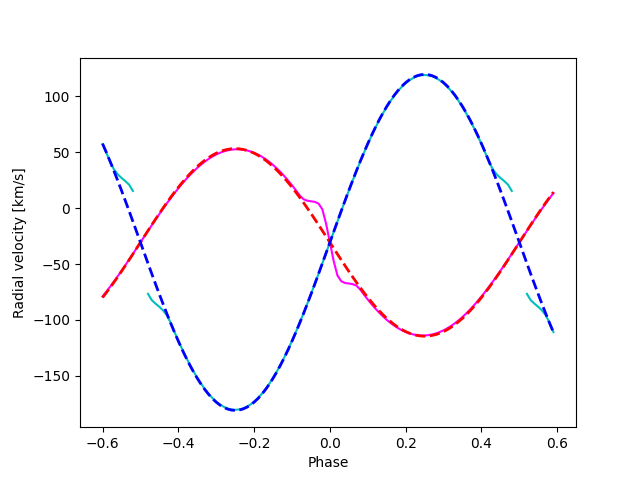

In [7]:
fig = plt.figure(3)
plt.plot(phases2, rvs2['primary'], color='magenta')
plt.plot(phases2, rvs2['secondary'], color='c')
plt.plot(phases, rvs['primary'], color='r', linestyle='dashed', linewidth=2.0)
plt.plot(phases, rvs['secondary'], color='b', linestyle='dashed', linewidth=2.0)
plt.xlabel('Phase')
plt.ylabel('Radial velocity [km/s]')
plt.show()